In [21]:
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from math import pi
import numpy as np
from numpy.random import randint

sim = Aer.get_backend('aer_simulator')

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

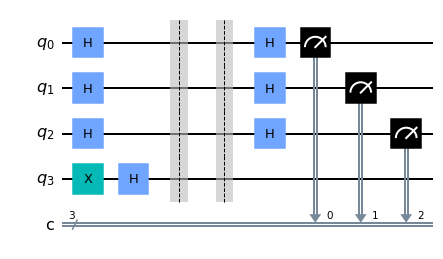

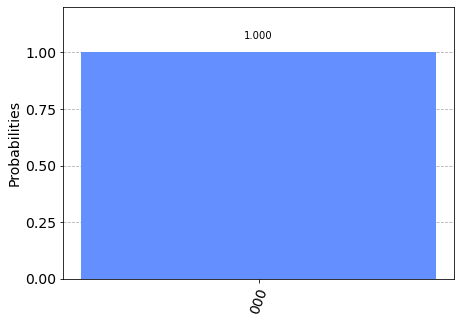

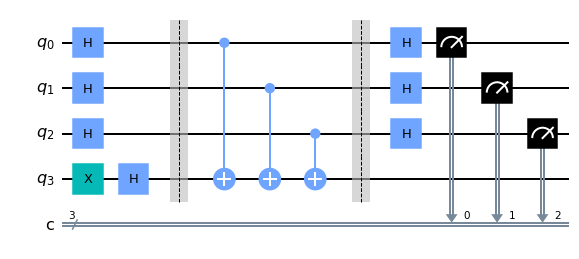

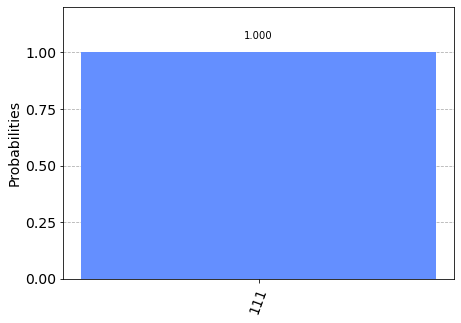

In [2]:
# Deutsch-Jozsa
n = 3

const_f = QuantumCircuit(n+1)
#display(const_f.draw())

balanced_f = QuantumCircuit(n+1)
for i in range(n):
    balanced_f.cx(i, n)
#display(balanced_f.draw())

for oracle in [const_f, balanced_f]:
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    for i in range(n+1):
        qc.h(i)
    qc.barrier()
    qc.compose(oracle, inplace=True)
    qc.barrier()
    for i in range(n):
        qc.h(i)
    for i in range(n):
        qc.measure(i, i)
    display(qc.draw())
    
    result = sim.run(qc).result()
    display(plot_histogram(result.get_counts()))

[1, 0, 1]

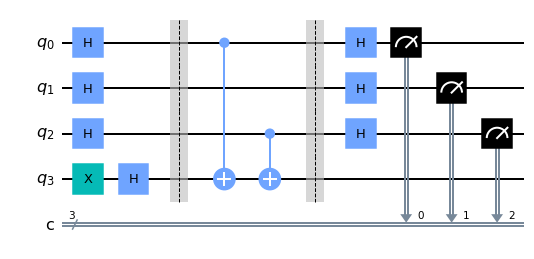

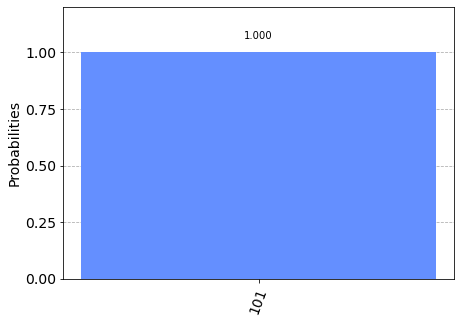

In [3]:
# Bernstein-Vazirani
n = 3
s = [randint(2) for i in range(n)]
display(list(reversed(s)))

qc = QuantumCircuit(n+1, n)
for i in range(n):
    qc.h(i)
qc.x(n)
qc.h(n)
qc.barrier()
for i in range(n):
    if s[i]:
        qc.cx(i, n)
qc.barrier()
for i in range(n):
    qc.h(i)
for i in range(n):
    qc.measure(i, i)
display(qc.draw())

result = sim.run(qc).result()
display(plot_histogram(result.get_counts()))

[0, 1, 1, 0, 1]

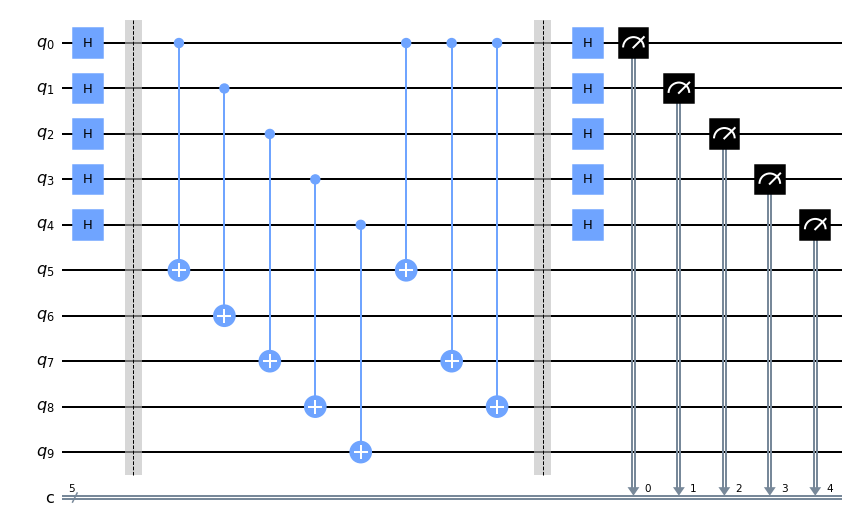

[array([0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 1]),
 array([1, 1, 1, 1, 0]),
 array([0, 0, 1, 1, 1]),
 array([0, 1, 1, 1, 0]),
 array([1, 1, 1, 0, 0]),
 array([1, 0, 1, 1, 1]),
 array([0, 1, 1, 0, 0]),
 array([1, 1, 0, 1, 1]),
 array([0, 1, 0, 0, 1]),
 array([0, 0, 1, 0, 1]),
 array([0, 1, 0, 1, 1]),
 array([1, 0, 0, 1, 0]),
 array([0, 0, 0, 1, 0]),
 array([1, 1, 0, 0, 1]),
 array([1, 0, 0, 0, 0])]

Column 0: pivot row = 1


[array([1, 0, 1, 0, 1]),
 array([0, 1, 0, 1, 1]),
 array([0, 0, 1, 1, 1]),
 array([0, 1, 1, 1, 0]),
 array([1, 1, 1, 0, 0]),
 array([1, 0, 1, 1, 1]),
 array([0, 1, 1, 0, 0]),
 array([1, 1, 0, 1, 1]),
 array([0, 1, 0, 0, 1]),
 array([0, 0, 1, 0, 1]),
 array([0, 1, 0, 1, 1]),
 array([1, 0, 0, 1, 0]),
 array([0, 0, 0, 1, 0]),
 array([1, 1, 0, 0, 1]),
 array([1, 0, 0, 0, 0])]

Column 1: pivot row = 1


[array([1, 0, 1, 0, 1]),
 array([0, 1, 0, 1, 1]),
 array([0, 0, 1, 1, 1]),
 array([0, 0, 1, 0, 1]),
 array([1, 0, 1, 1, 1]),
 array([1, 0, 1, 1, 1]),
 array([0, 1, 1, 0, 0]),
 array([1, 1, 0, 1, 1]),
 array([0, 1, 0, 0, 1]),
 array([0, 0, 1, 0, 1]),
 array([0, 1, 0, 1, 1]),
 array([1, 0, 0, 1, 0]),
 array([0, 0, 0, 1, 0]),
 array([1, 1, 0, 0, 1]),
 array([1, 0, 0, 0, 0])]

Column 2: pivot row = 2


[array([1, 0, 0, 1, 0]),
 array([0, 1, 0, 1, 1]),
 array([0, 0, 1, 1, 1]),
 array([0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 1, 1, 1]),
 array([0, 1, 1, 0, 0]),
 array([1, 1, 0, 1, 1]),
 array([0, 1, 0, 0, 1]),
 array([0, 0, 1, 0, 1]),
 array([0, 1, 0, 1, 1]),
 array([1, 0, 0, 1, 0]),
 array([0, 0, 0, 1, 0]),
 array([1, 1, 0, 0, 1]),
 array([1, 0, 0, 0, 0])]

Column 3: pivot row = 3


[array([1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 1]),
 array([0, 0, 1, 0, 1]),
 array([0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 1, 1, 1]),
 array([0, 1, 1, 0, 0]),
 array([1, 1, 0, 1, 1]),
 array([0, 1, 0, 0, 1]),
 array([0, 0, 1, 0, 1]),
 array([0, 1, 0, 1, 1]),
 array([1, 0, 0, 1, 0]),
 array([0, 0, 0, 1, 0]),
 array([1, 1, 0, 0, 1]),
 array([1, 0, 0, 0, 0])]

Column 4: pivot row = 5


[array([1, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 0]),
 array([1, 0, 0, 1, 0]),
 array([0, 0, 0, 1, 0]),
 array([1, 0, 1, 1, 1]),
 array([1, 0, 0, 0, 0]),
 array([0, 1, 1, 0, 0]),
 array([1, 1, 0, 1, 1]),
 array([0, 1, 0, 0, 1]),
 array([0, 0, 1, 0, 1]),
 array([0, 1, 0, 1, 1]),
 array([1, 0, 0, 1, 0]),
 array([0, 0, 0, 1, 0]),
 array([1, 1, 0, 0, 1]),
 array([1, 0, 0, 0, 0])]

[0 1 1 0 1]


In [4]:
# Simon
n = 5
b = [randint(2) for i in range(n)]
if not np.any(b): # disallow all-zeros
    b[0] = 1
display(list(reversed(b)))

qc = QuantumCircuit(n*2, n)
for i in range(n):
    qc.h(i)
qc.barrier()

for i in range(n):
    qc.cx(i, n+i)
first_one = b.index(1)
for i in range(n):
    if b[i]:
        qc.cx(first_one, n+i)
    
qc.barrier()
for i in range(n):
    qc.h(i)
    qc.measure(i, i)
display(qc.draw())

result = sim.run(qc).result()

a = []
for s in result.get_counts():
    a.append(np.fromiter((int(b) for b in s), int))

# Work on one column at a time
for col in range(n):
    display(a)

    pivot = None
    for i in range(col, len(a)):
        if a[i][col]:
            pivot = i
            break
    if pivot is None:
        print(f'Column {col}: No suitable pivot row found')
        continue
    else:
        print(f'Column {col}: pivot row = {pivot}')

    # Move the pivot row to row 'col' and do elimination
    a[pivot], a[col] = a[col], a[pivot]
    for j in range(n):
        if col != j and a[j][col]:
            a[j] = np.bitwise_xor(a[j], a[col])

    # Remove all-zero vectors for readability
    a = list(filter(lambda x: np.sum(x) > 0, a))

# If a vector has a single '1' in any column, that means that bit must be zero
display(a)
answer = np.ones(n, dtype=int)
for s in a:
    if np.sum(s) == 1:
        answer[np.nonzero(s)[0][0]] = 0
print(answer)

input = 0


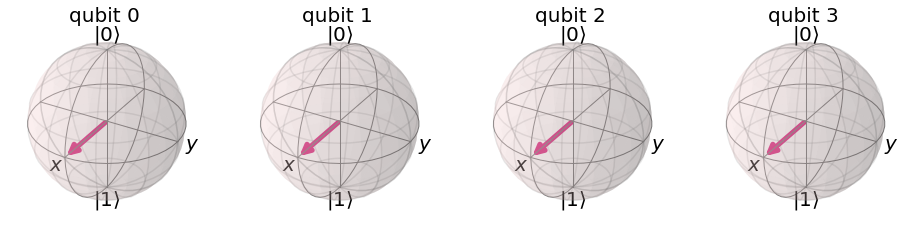

input = 1


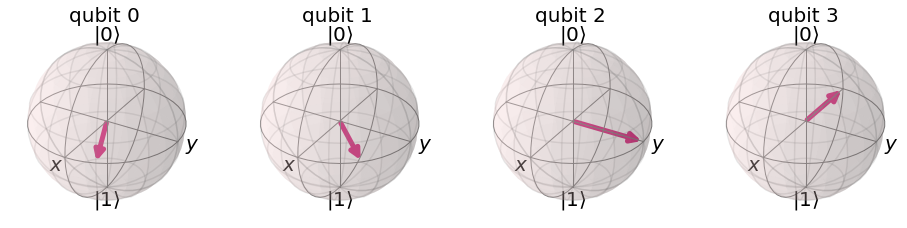

input = 2


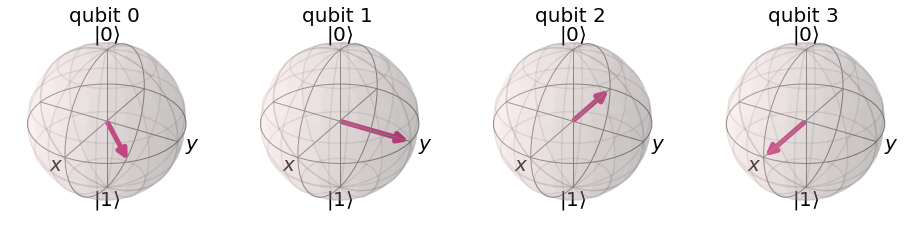

input = 3


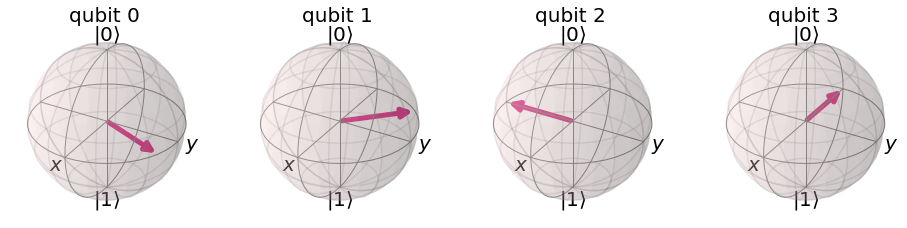

input = 4


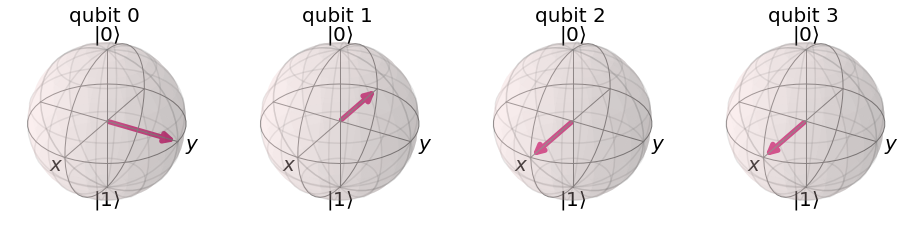

input = 5


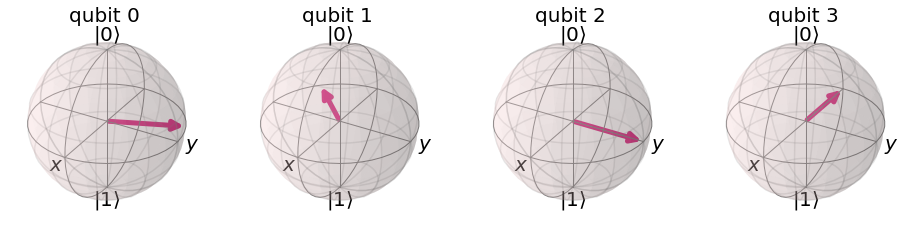

input = 6


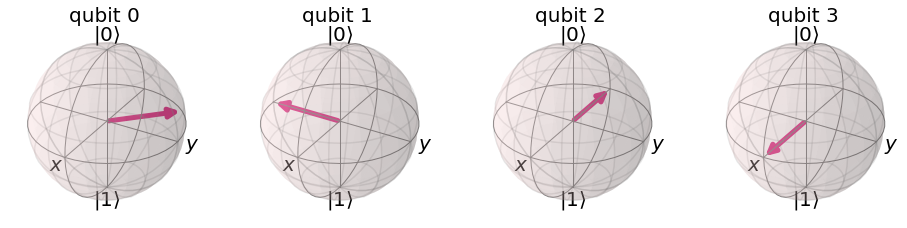

input = 7


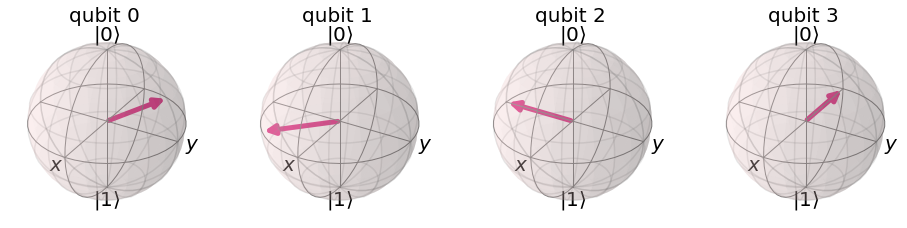

input = 8


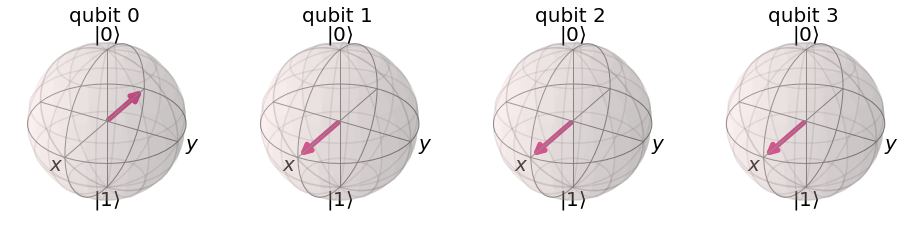

input = 9


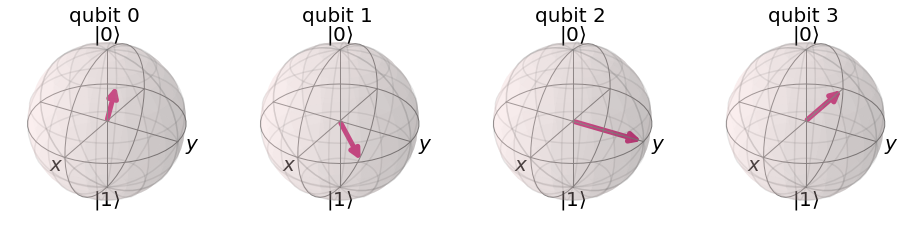

input = 10


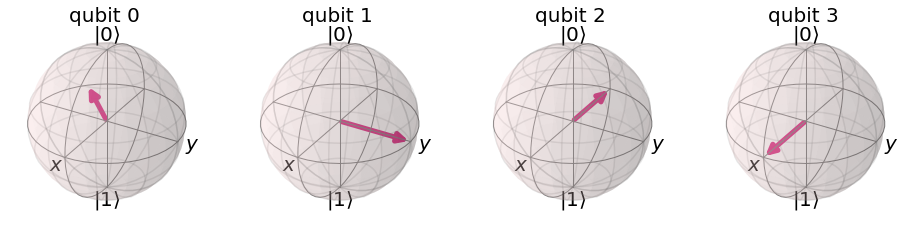

input = 11


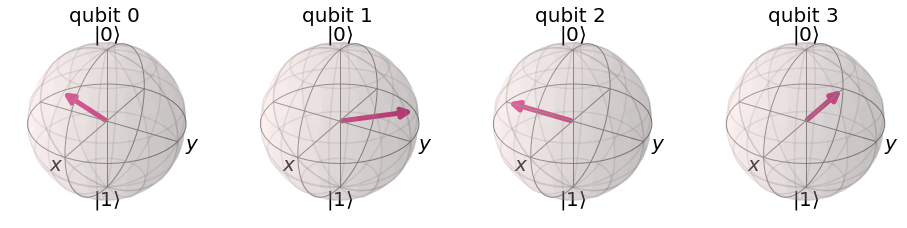

input = 12


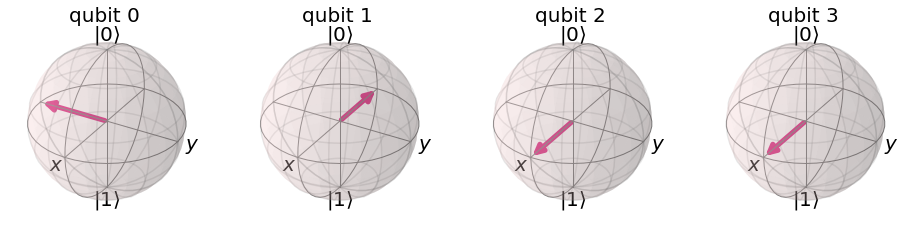

input = 13


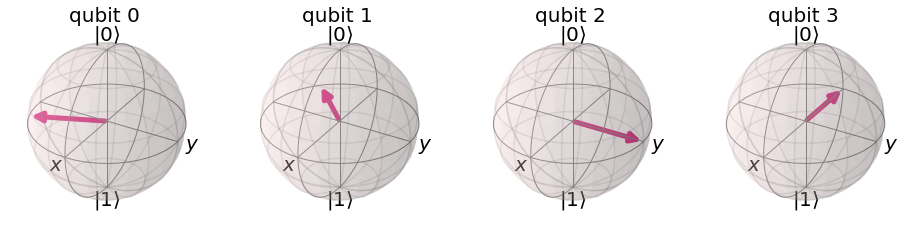

input = 14


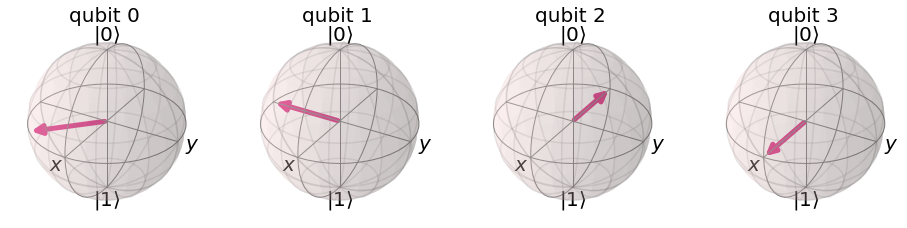

input = 15


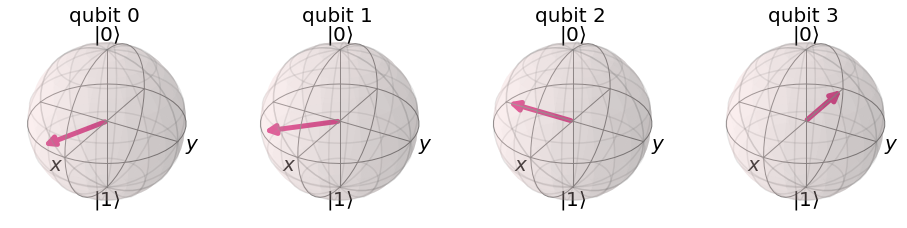

In [23]:
# QFT
n = 4

def encode(n, num):
    qc = QuantumCircuit(n)
    for i in range(qc.num_qubits):
        if num % 2 == 1:
            qc.x(i)
        num //= 2
    return qc

def qft(n):
    qc = QuantumCircuit(n)
    for i in reversed(range(qc.num_qubits)):
        qc.h(i)
        angle = pi/(2**i)
        for j in range(i):
            qc.cp(angle, j, i)
            angle *= 2
    for i in range(n//2):
        qc.swap(i, n-i-1)
    return qc

def iqft(n):
    qc = QuantumCircuit(n)
    for i in reversed(range(qc.num_qubits)):
        qc.h(i)
        angle = -pi/(2**i)
        for j in range(i):
            qc.cp(angle, j, i)
            angle *= 2
    for i in range(n//2):
        qc.swap(i, n-i-1)
    return qc.reverse_ops()

for i in range(2**n):
    print(f"input = {i}")
    qc = QuantumCircuit(n)
    qc = qc.compose(encode(n, i))
    qc.barrier()
    qc = qc.compose(qft(n))
    #qc = qc.compose(iqft(n))
    qc.save_statevector()
    statevector = sim.run(qc).result().get_statevector()
    display(plot_bloch_multivector(statevector))